# Sliders for initial parameters

In [7]:
import ipywidgets as widgets
from ipywidgets import Button, Layout
from os import walk
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from cpymad.madx import Madx
import numpy as np
from pybt.tools.plotters import *

In [8]:
start_path = "/eos/user/e/eljohnso/SWAN_projects/quad-scan-east/df/t8/"
end_path = ""
mypath = start_path+"/"+end_path

f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break

In [9]:
# Open measurement
df = pd.DataFrame()

with open(start_path+filenames[0], 'rb') as handle:
    df_i = pickle.load(handle)
    print(filenames[0])
df = pd.concat([df,df_i])

df_meas_btv96.pickle


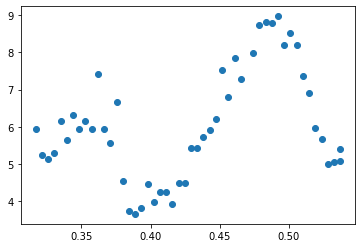

In [10]:
fig, ax = plt.subplots()
ax.scatter(df.loc[df.Acqu==3].k_qfn01, df.loc[df.Acqu==3].poptH3_cal)

In [11]:
start_path = "/eos/home-e/eljohnso/SWAN_projects/quad-scan-east/df/t8/"
end_path = ""
mypath = start_path+"/"+end_path

f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break
filenames

with open(start_path+filenames[1], 'rb') as handle:
    df_t8 = pickle.load(handle)
    print(filenames[1])

df_quad_scan_t8_bpms_2022_07_27_17h01m48s.pickle


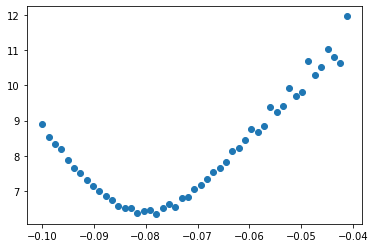

In [13]:
fig, ax = plt.subplots()
ax.scatter(df_t8.k_qdn07, df_t8.sigH)

In [14]:
gamma = 25.598474067
beta = np.sqrt(1-gamma**(-2))
exn = 4.92e-06
eyn = 3.4e-06
sige = 0.000412
ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)
Brho = 24*3.3356

In [26]:
betx0 = 147.307
bety0 = 4.682
alfx0 = -41.147
alfy0 = 0.066
Dx0 = 0.13
Dy0 = 0.0
Dpx0 = 0.02
Dpy0 = 0.0
exn = 4.92e-06
eyn =  3.4e-06
sige = 0.000412

#################################### Initialize MADX ####################################
with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.call("/eos/user/e/eljohnso/SWAN_projects/acc-models-tls-eliott-fork/ps_extraction/f61t8/f61t8_op.str")
madx.call("/eos/user/e/eljohnso/SWAN_projects/acc-models-tls-eliott-fork/ps_extraction/f61t8/f61t8_op.seq")

ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)

madx.command.beam(particle='PROTON',pc="24",ex=ex,ey=ey)
madx.input('BRHO      := BEAM->PC * 3.3356;')


madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APER_1,APER_2,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')

madx.input('SEQEDIT, SEQUENCE=f61t8_op;')
madx.input('FLATTEN;')
madx.input('REMOVE, ELEMENT=ARBMATRIX;')
madx.input('FLATTEN;')
madx.input('ENDEDIT;')

madx.input("F62.BTV002 : MARKER;")
madx.input('SEQEDIT, sequence=f61t8_op;')
madx.input('FLATTEN;')
madx.command.install(element = 'F62.BTV002', at=1.250107+0.406, from_="F61.MBXHD033")
madx.input('FLATTEN;')
madx.input('ENDEDIT;')

madx.use(sequence="f61t8_op")

%matplotlib widget
Output1 = widgets.Output(layout=Layout(width='70%', height='auto'))

betx0 = widgets.FloatSlider(
    value=82.4,
    min=1.0,
    max=300,
    step=1,
    description='betx0:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
betx0_box = widgets.BoundedFloatText(
    value=82.4,
    min=1.0,
    max=300,
    step=1,
    description='betx0:',
    disabled=False,
    style={'description_width': 'initial'},
    layout = widgets.Layout(width='200px'),
    readout=True
)
widgets.jslink((betx0, 'value'), (betx0_box, 'value'))

bety0 = widgets.FloatSlider(
    value=33.2,
    min=1.0,
    max=300,
    step=1,
    description='bety0:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
bety0_box = widgets.BoundedFloatText(
    value=33.2,
    min=1.0,
    max=100,
    step=0.1,
    description='bety0:',
    disabled=False,
    style={'description_width': 'initial'},
    layout = widgets.Layout(width='200px'),
    readout=True
)
widgets.jslink((bety0, 'value'), (bety0_box, 'value'))

alfx0 = widgets.FloatSlider(
    value=-11.1,
    min=-100.0,
    max=100.0,
    step=0.1,
    description='alfx0:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
alfx0_box = widgets.BoundedFloatText(
    value=-11.1,
    min=-100.0,
    max=100.0,
    step=0.1,
    description='alfx0:',
    disabled=False,
    style={'description_width': 'initial'},
    layout = widgets.Layout(width='200px'),
    readout=True,
    readout_format='.3f',
)
widgets.jslink((alfx0, 'value'), (alfx0_box, 'value'))

alfy0 = widgets.FloatSlider(
    value=0.28,
    min=-100,
    max=100,
    step=0.1,
    description='alfy0:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
alfy0_box = widgets.BoundedFloatText(
    value=0.28,
    min=-100,
    max=100,
    step=0.1,
    description='alfy0:',
    disabled=False,
    style={'description_width': 'initial'},
    layout = widgets.Layout(width='200px'),
    readout=True,
    readout_format='.3f',
)
widgets.jslink((alfy0, 'value'), (alfy0_box, 'value'))

dx0 = widgets.FloatSlider(
    value=0.13,
    min=0.0,
    max=100,
    step=1,
    description='dx0:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
dx0_box = widgets.BoundedFloatText(
    value=0.13,
    min=0.0,
    max=100,
    step=1,
    description='dx0:',
    disabled=False,
    style={'description_width': 'initial'},
    layout = widgets.Layout(width='200px'),
    readout=True
)
widgets.jslink((dx0, 'value'), (dx0_box, 'value'))

dpx0 = widgets.FloatSlider(
    value=0.02,
    min=0.0,
    max=100,
    step=1,
    description='dpx0:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
dpx0_box = widgets.BoundedFloatText(
    value=0.02,
    min=0.0,
    max=100,
    step=1,
    description='dpx0:',
    disabled=False,
    style={'description_width': 'initial'},
    layout = widgets.Layout(width='200px'),
    readout=True
)
widgets.jslink((dpx0, 'value'), (dpx0_box, 'value'))


dy0 = widgets.FloatSlider(
    value=0.0,
    min=0.0,
    max=100,
    step=1,
    description='dy0:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
dy0_box = widgets.BoundedFloatText(
    value=0.0,
    min=0.0,
    max=100,
    step=1,
    description='dy0:',
    disabled=False,
    style={'description_width': 'initial'},
    layout = widgets.Layout(width='200px'),
    readout=True
)
widgets.jslink((dy0, 'value'), (dy0_box, 'value'))

dpy0 = widgets.FloatSlider(
    value=0.0,
    min=0.0,
    max=100,
    step=1,
    description='dpy0:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
dpy0_box = widgets.BoundedFloatText(
    value=0.0,
    min=0.0,
    max=100,
    step=1,
    description='dpy0:',
    disabled=False,
    style={'description_width': 'initial'},
    layout = widgets.Layout(width='200px'),
    readout=True
)
widgets.jslink((dpy0, 'value'), (dpy0_box, 'value'))

exn = widgets.FloatSlider(
    value=1.5e-6,
    min=0.0,
    max=5.0e-5,
    step=0.1e-6,
    description='exn:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
exn_box = widgets.BoundedFloatText(
    value=1.5e-6,
    min=0.0,
    max=5.0e-5,
    step=0.1e-6,
    description='exn:',
    disabled=False,
    style={'description_width': 'initial'},
    layout = widgets.Layout(width='200px'),
    readout=True,
    readout_format='.2f',
)
widgets.jslink((exn, 'value'), (exn_box, 'value'))

eyn = widgets.FloatSlider(
    value=1.5e-6,
    min=0.0,
    max=5.0e-5,
    step=0.1e-6,
    description='eyn:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
eyn_box = widgets.BoundedFloatText(
    value=1.5e-6,
    min=0.0,
    max=5.0e-5,
    step=0.1e-6,
    description='eyn:',
    disabled=False,
    style={'description_width': 'initial'},
    layout = widgets.Layout(width='200px'),
    readout=True,
    readout_format='.2f',
)
widgets.jslink((eyn, 'value'), (eyn_box, 'value'))

sige = widgets.FloatSlider(
    value=7.53e-4,
    min=0.0,
    max=1.0e-3,
    step=0.1e-4,
    description='sige:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
sige_box = widgets.BoundedFloatText(
    value=7.53e-4,
    min=0.0,
    max=1.0e-3,
    step=0.1e-4,
    description='sige:',
    disabled=False,
    style={'description_width': 'initial'},
    layout = widgets.Layout(width='200px'),
    readout=True,
    readout_format='.2f',
)
widgets.jslink((sige, 'value'), (sige_box, 'value'))

def on_value_change(change):

    with Output1:
        ax[0,0].clear()
        ax[0,1].clear()
        ax[1,0].clear()
        ax[1,1].clear()
        
        ex = exn.value/(beta*gamma)
        ey = eyn.value/(beta*gamma)

        madx.command.beam(particle='PROTON',pc="24",ex=ex,ey=ey)
        madx.input('BRHO      := BEAM->PC * 3.3356;')


        H_sigma_madx = []
        V_sigma_madx = []
        for i in range(len(df.k_qfn01.unique())):
            k_qfn01 = df.k_qfn01.unique()[i]
            k_qdn02 = df.k_qdn02.unique()[i]
            k_qfn03 = df.k_qfn03.unique()[i]

            madx.input("kQFN1 = "+str(k_qfn01)+";")
            madx.input("kQDN2 = "+str(k_qdn02)+";")
            madx.input("kQFN3 = "+str(k_qfn03)+";")
            madx.input("kQDN4 = -0.09035;")
            madx.input("kQFN5 = 0.196;")
            madx.input("kQDN6 = -0.1946;")
            madx.input("kQDN7 = -0.061403;")
            madx.input("kQFN8 = 0.069031;")

            madx.use(sequence="f61t8_op")
            twiss_f61 = madx.twiss(betx=betx0.value, bety=bety0.value, alfx=alfx0.value, alfy=alfy0.value, Dx=dx0.value, Dy=dy0.value, Dpx=dpx0.value, Dpy=dpy0.value).dframe()

            H_sigma_madx.append( beam_size(twiss_f61['betx']["t08.btv096"], twiss_f61['dx']["t08.btv096"], ex, sige.value, 1) )
            V_sigma_madx.append( beam_size(twiss_f61['bety']["t08.btv096"], twiss_f61['dy']["t08.btv096"], ey, sige.value, 1) )
            
        H_sigma_madx_mwpc = []
        V_sigma_madx_mwpc = []
        for i in range(len(df_t8)):
            madx.input("kQFN1 = "+str(df_t8.k_qfn01.iloc[i])+";")
            madx.input("kQDN2 = "+str(df_t8.k_qdn02.iloc[i])+";")
            madx.input("kQFN3 = "+str(df_t8.k_qfn03.iloc[i])+";")
            madx.input("kQDN4 = "+str(df_t8.k_qdn04.iloc[i])+";")
            madx.input("kQFN5 = "+str(df_t8.k_qfn05.iloc[i])+";")
            madx.input("kQDN6 = "+str(df_t8.k_qdn06.iloc[i])+";")
            madx.input("kQDN7 = "+str(df_t8.k_qdn07.iloc[i])+";")
            madx.input("kQFN8 = "+str(df_t8.k_qfn08.iloc[i])+";")

            madx.use(sequence="f61t8_op")
            twiss_f61 = madx.twiss(betx=betx0.value, bety=bety0.value, alfx=alfx0.value, alfy=alfy0.value, Dx=dx0.value, Dy=dy0.value, Dpx=dpx0.value, Dpy=dpy0.value).dframe()

            H_sigma_madx_mwpc.append( beam_size(twiss_f61['betx']["t08.xwcm103"], twiss_f61['dx']["t08.xwcm103"], ex, sige.value, 1) )
            V_sigma_madx_mwpc.append( beam_size(twiss_f61['bety']["t08.xwcm103"], twiss_f61['dy']["t08.xwcm103"], ey, sige.value, 1) )



        #MAD-X
        ax[0,0].scatter(df.k_qfn01.unique(), np.array(H_sigma_madx)*1000, color="blue", linewidth=2, zorder=99, label="MAD-X")
        ax[0,1].scatter(df.k_qfn01.unique(), np.array(V_sigma_madx)*1000, color="red", linewidth=2, zorder=99, label="MAD-X")

        ax[0,0].set_xlabel("K QFN01 [A]")
        ax[0,0].set_ylabel("H beam size $1\sigma$ [mm]")

        ax[0,1].set_xlabel("K QFN01 [A]")
        ax[0,1].set_ylabel("V beam size $1\sigma$ [mm]")

        
        ax[1,0].scatter(df_t8.k_qdn07, np.array(H_sigma_madx_mwpc)*1000, color="blue", linewidth=2, zorder=99, label="MAD-X")
        ax[1,1].scatter(df_t8.k_qdn07, np.array(V_sigma_madx_mwpc)*1000, color="red", linewidth=2, zorder=99, label="MAD-X")
        
        # Box with initial parameters
        textstr = '\n'.join((
            "Matched initial parameters:",
            r'$\beta_{x}$='+str(round(betx0.value,3)),
            r'$\beta_{y}$='+str(round(bety0.value,3)),
            r'$\alpha_{x}$='+str(round(alfx0.value,3)),
            r'$\alpha_{y}$='+str(round(alfy0.value,3)),
            r'$D_{x}$='+str(round(dx0.value,3)),
            r'$D_{y}$='+str(round(dy0.value,3)),
            r'$D_{px}$='+str(round(dpx0.value,3)),
            r'$D_{py}$='+str(round(dpy0.value,3)),
            r'$exn$='+str(round(exn.value,8)),
            r'$eyn$='+str(round(eyn.value,8)),
            r'$\frac{dp}{p}$='+str(round(sige.value,6)),
            ))

        props = dict(boxstyle='square', facecolor='white', alpha=0.5)

        # place a text box in upper left in axes coords
        ax[0,0].text(0.7, 0.8, textstr, transform=ax[0,0].transAxes, fontsize=12,
                verticalalignment='top', bbox=props)



        # Plot the measurements
        ax[0,0].scatter(df.loc[df.Acqu==3].k_qfn01, df.loc[df.Acqu==3].poptH3_cal, color="cornflowerblue", marker="x", label="Measurements")
        ax[0,1].scatter(df.loc[df.Acqu==3].k_qfn01, df.loc[df.Acqu==3].poptV3_cal, color="tomato", marker="x", label="Measurements")

        ax[1,0].scatter(df_t8.k_qdn07, df_t8.sigH, color="cornflowerblue", marker="x", label="Measurements")
        ax[1,1].scatter(df_t8.k_qdn07, df_t8.sigV, color="tomato", marker="x", label="Measurements")
        
        # fig.suptitle(f"{subset_dirnames}")
        # plt.savefig("fig/quad_scan_filter_pybobqa.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

        ax[0,0].legend()
        ax[0,1].legend()



display(widgets.HBox([Output1, widgets.VBox([betx0, bety0, alfx0, alfy0, dx0, dpx0, dy0, dpy0, exn, eyn, sige]),
                      widgets.VBox([betx0_box, bety0_box, alfx0_box, alfy0_box, dx0_box, dpx0_box, dy0_box, dpy0_box, exn_box, eyn_box, sige_box]) ]))

with Output1:
    fig, ax = plt.subplots(2,2, figsize=(14,10), tight_layout=True)

betx0.observe(on_value_change, names='value')
bety0.observe(on_value_change, names='value')
alfx0.observe(on_value_change, names='value')
alfy0.observe(on_value_change, names='value')
dx0.observe(on_value_change, names='value')
dy0.observe(on_value_change, names='value')
dpx0.observe(on_value_change, names='value')
dpy0.observe(on_value_change, names='value')
exn.observe(on_value_change, names='value')
eyn.observe(on_value_change, names='value')
sige.observe(on_value_change, names='value')